In [4]:
#Import Libraries & Load Datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

# Load datasets (adjust file paths as necessary)
sales_df = pd.read_csv('sales.csv')          # includes date, item_id, store_id, item_count
items_df = pd.read_csv('items.csv')          # includes item_id, item_name, kcal, price
stores_df = pd.read_csv('resturants.csv')        # includes resturants_id, resturant_name


In [5]:
#Inspect Datasets
# Basic info
print(sales_df.info())
print(items_df.info())
print(stores_df.info())

# Check shapes
print("Sales shape:", sales_df.shape)
print("Items shape:", items_df.shape)
print("Stores shape:", stores_df.shape)

# Preview
print(sales_df.head())
print(items_df.head())
print(stores_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        109600 non-null  object 
 1   item_id     109600 non-null  int64  
 2   item_count  109600 non-null  int64  
 3   price       109600 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        100 non-null    int64  
 1   store_id  100 non-null    int64  
 2   name      100 non-null    object 
 3   kcal      100 non-null    int64  
 4   cost      100 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count 

In [6]:
# Checking for Missing Values and Duplicates
# Missing values
print("Missing values in sales:\n", sales_df.isnull().sum())
print("Missing values in items:\n", items_df.isnull().sum())
print("Missing values in stores:\n", stores_df.isnull().sum())

# Remove duplicates
sales_df.drop_duplicates(inplace=True)
items_df.drop_duplicates(inplace=True)
stores_df.drop_duplicates(inplace=True)


Missing values in sales:
 date          0
item_id       0
item_count    0
price         0
dtype: int64
Missing values in items:
 id          0
store_id    0
name        0
kcal        0
cost        0
dtype: int64
Missing values in stores:
 id      0
name    0
dtype: int64


In [8]:
#Merge Datasets into One Master DataFrame

# Convert 'date' to datetime
sales_df['date'] = pd.to_datetime(sales_df['date'], format='%d-%m-%Y')

# Merge: sales + items + stores
df = sales_df.merge(items_df, left_on='item_id', right_on='id', how='left')
df = df.merge(stores_df, left_on='store_id', right_on='id', how='left')

# Create 'sales_amount' column
df['sales_amount'] = df['item_count'] * df['price']

# Final structure check
print(df.head())
print(df.info())

        date  item_id  item_count   price  id_x  store_id  \
0 2019-01-01        3           2   58.44     3         1   
1 2019-01-01        4          22  581.24     4         1   
2 2019-01-01       12           7   34.09    12         1   
3 2019-01-01       13          12   50.16    13         1   
4 2019-01-01       16         136  436.56    16         1   

                            name_x  kcal   cost  id_y       name_y  \
0                Sweet Fruity Cake   931  29.22     1  Bob's Diner   
1  Amazing Steak Dinner with Rolls   763  26.42     1  Bob's Diner   
2             Fantastic Sweet Cola   478   4.87     1  Bob's Diner   
3          Sweet Frozen Soft Drink   490   4.18     1  Bob's Diner   
4             Frozen Milky Smoothy   284   3.21     1  Bob's Diner   

   sales_amount  
0        116.88  
1      12787.28  
2        238.63  
3        601.92  
4      59372.16  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 12 col

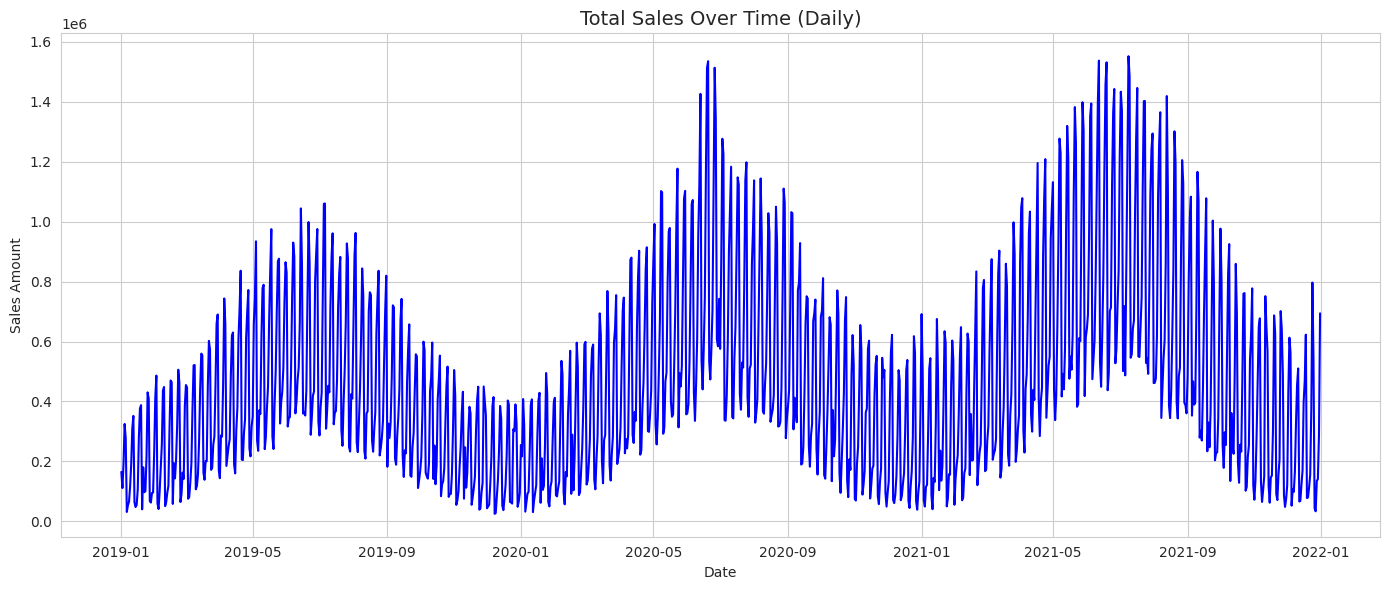

In [9]:
#Daily Sales Trend

# Group by date
daily_sales = df.groupby('date')['sales_amount'].sum().reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_sales, x='date', y='sales_amount', color='blue')
plt.title('Total Sales Over Time (Daily)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.tight_layout()
plt.show()


/tmp/ipython-input-10-1020869729.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_sales, x='weekday', y='sales_amount', palette='viridis')


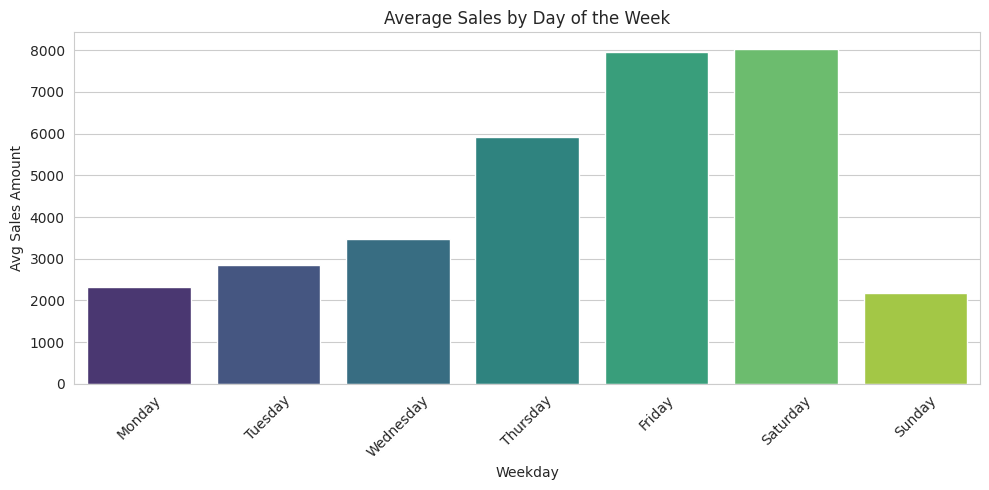

In [10]:
#Day of the Week Trend

# Add weekday column
df['weekday'] = df['date'].dt.day_name()

# Average sales by weekday
weekday_sales = df.groupby('weekday')['sales_amount'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=weekday_sales, x='weekday', y='sales_amount', palette='viridis')
plt.title('Average Sales by Day of the Week')
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.ylabel('Avg Sales Amount')
plt.tight_layout()
plt.show()


/tmp/ipython-input-11-1544405823.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x='month', y='sales_amount', palette='coolwarm')


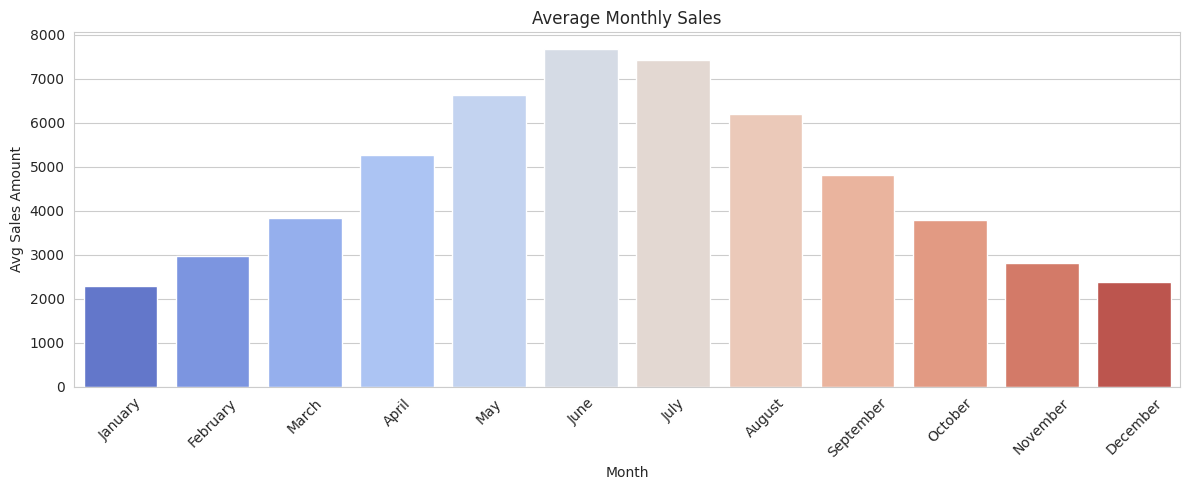

In [11]:
#Monthly Sales Trend

# Add month column
df['month'] = df['date'].dt.month_name()

# Average sales by month
monthly_sales = df.groupby('month')['sales_amount'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]).reset_index()

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(data=monthly_sales, x='month', y='sales_amount', palette='coolwarm')
plt.title('Average Monthly Sales')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Avg Sales Amount')
plt.tight_layout()
plt.show()


/tmp/ipython-input-12-2852881463.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quarterly_sales, x='quarter', y='sales_amount', palette='mako')


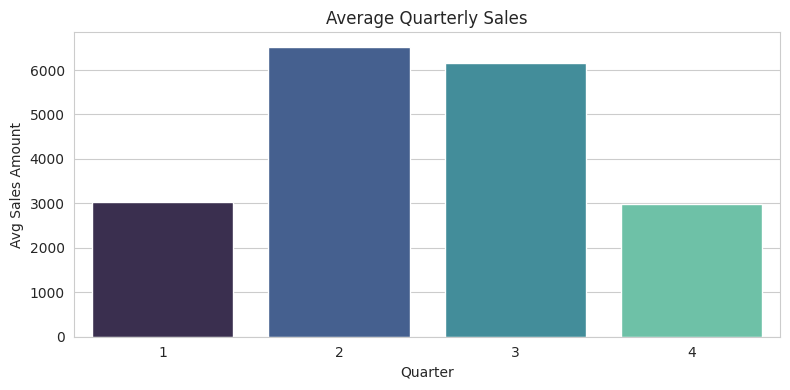

In [12]:
#Quarterly Sales Pattern

# Add quarter column
df['quarter'] = df['date'].dt.quarter

# Average sales by quarter
quarterly_sales = df.groupby('quarter')['sales_amount'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=quarterly_sales, x='quarter', y='sales_amount', palette='mako')
plt.title('Average Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Avg Sales Amount')
plt.tight_layout()
plt.show()


/tmp/ipython-input-22-3002004487.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=store_sales, x='name_y', y='sales_amount', palette='rocket')


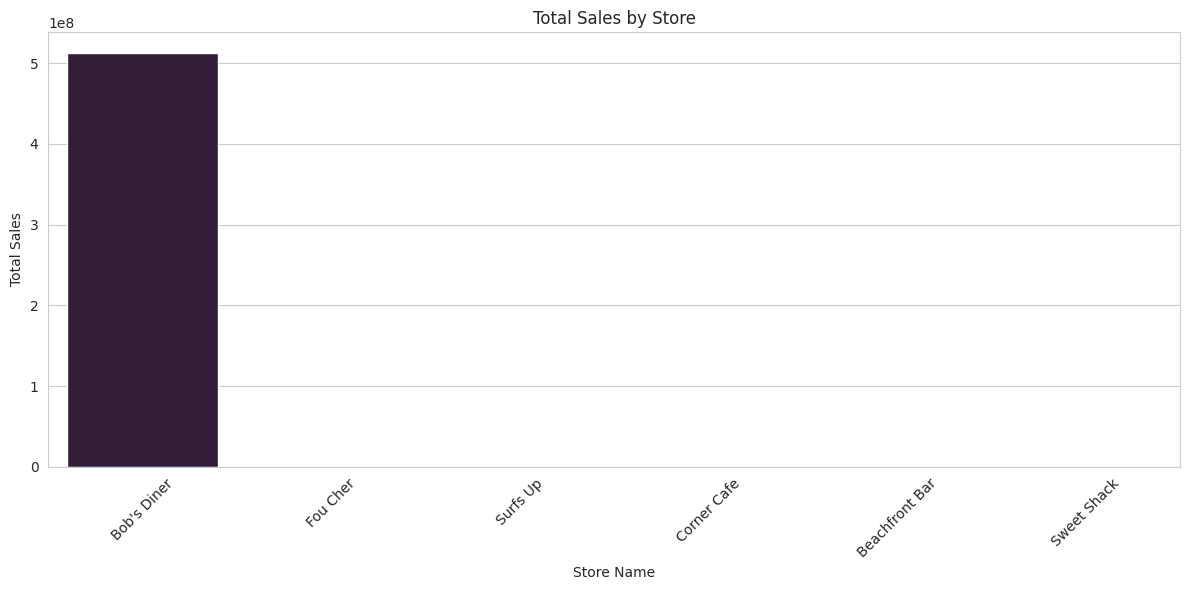

In [22]:
# Restaurant Sales Comparison

# Total sales by store
store_sales = df.groupby('name_y')['sales_amount'].sum().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=store_sales, x='name_y', y='sales_amount', palette='rocket')
plt.title('Total Sales by Store')
plt.xticks(rotation=45)
plt.xlabel('Store Name')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

/tmp/ipython-input-24-135957109.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popular_items, x='item_count', y='name_x', palette='crest')


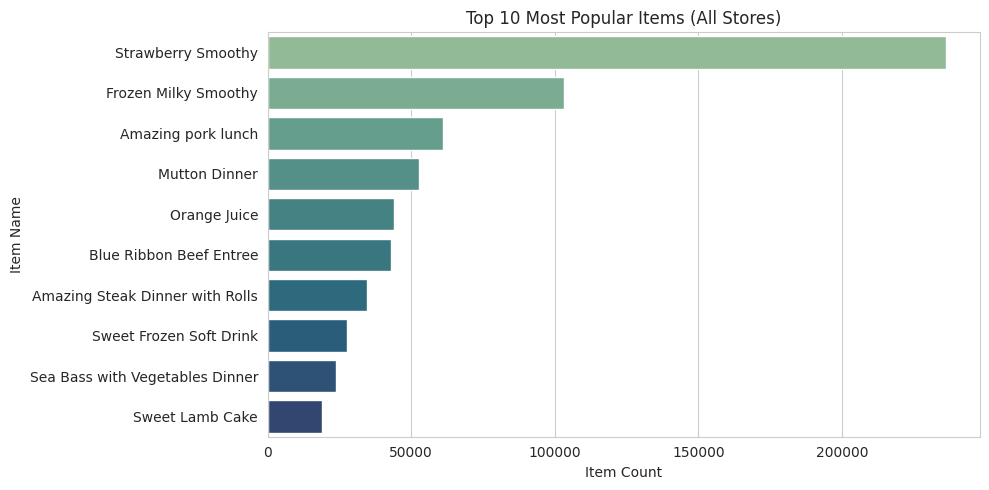

Most popular item at each store:
             name_y                         name_x  item_count
25     Bob's Diner             Strawberry Smoothy      236337
92     Sweet Shack                Awesome Smoothy        1692
1   Beachfront Bar        Fantastic Milky Smoothy        1147
85        Surfs Up             Awesome Soft Drink         997
57        Fou Cher  Blue Ribbon Fruity Vegi Lunch         298
40     Corner Cafe           Frozen Milky Smoothy         273


In [24]:
#Most Popular Items Overall and by Store

# Overall most sold items
popular_items = df.groupby('name_x')['item_count'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=popular_items, x='item_count', y='name_x', palette='crest')
plt.title('Top 10 Most Popular Items (All Stores)')
plt.xlabel('Item Count')
plt.ylabel('Item Name')
plt.tight_layout()
plt.show()

# Most popular item per store
popular_by_store = df.groupby(['name_y', 'name_x'])['item_count'].sum().reset_index()
idx = popular_by_store.groupby('name_y')['item_count'].idxmax()
top_items_store = popular_by_store.loc[idx].sort_values(by='item_count', ascending=False)

print("Most popular item at each store:\n", top_items_store)

In [26]:
#Highest Sales Volume vs Highest Revenue Per Day

# Sales volume and revenue by store
store_metrics = df.groupby('name_y').agg({
    'item_count': 'sum',
    'sales_amount': 'sum',
    'date': pd.Series.nunique  # days of operation
}).reset_index()
store_metrics['avg_daily_revenue'] = store_metrics['sales_amount'] / store_metrics['date']

# Compare stores
top_sales_store = store_metrics.sort_values(by='item_count', ascending=False).head(1)
top_revenue_store = store_metrics.sort_values(by='avg_daily_revenue', ascending=False).head(1)

print("Store with highest total sales volume:\n", top_sales_store)
print("Store with highest average daily revenue:\n", top_revenue_store)

Store with highest total sales volume:
         name_y  item_count  sales_amount  date  avg_daily_revenue
1  Bob's Diner      687527  5.124830e+08  1096      467594.007546
Store with highest average daily revenue:
         name_y  item_count  sales_amount  date  avg_daily_revenue
1  Bob's Diner      687527  5.124830e+08  1096      467594.007546


In [28]:
#Most Expensive Item and Its Calorie Count Per Store

# Most expensive item per restaurant
max_price = df.groupby(['name_y', 'name_x', 'kcal'])['price'].max().reset_index()
idx = max_price.groupby('name_y')['price'].idxmax()
expensive_items = max_price.loc[idx].sort_values(by='price', ascending=False)

print("Most expensive items per restaurant with kcal info:\n", expensive_items)

Most expensive items per restaurant with kcal info:
             name_y                         name_x  kcal    price
21     Bob's Diner                  Mutton Dinner   542  2224.80
57        Fou Cher  Blue Ribbon Fruity Vegi Lunch   881   107.96
33     Corner Cafe   Awesome Hamburger with Fries   673    78.12
91        Surfs Up                     Steak Meal   607    52.42
1   Beachfront Bar        Fantastic Milky Smoothy   318    14.55
92     Sweet Shack                Awesome Smoothy    78     8.34


In [29]:
# Part 2: Machine Learning Forecasting (Item Count)
 #Feature Engineering

df['day'] = df['date'].dt.day
df['month_num'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['weekday_num'] = df['date'].dt.weekday
df['quarter'] = df['date'].dt.quarter


In [30]:
#Train-Test Split (Last 6 Months for Test)

# Sort and split
df = df.sort_values('date')
cutoff_date = df['date'].max() - pd.DateOffset(months=6)
train = df[df['date'] < cutoff_date]
test = df[df['date'] >= cutoff_date]

# Features and target
features = ['day', 'month_num', 'year', 'weekday_num', 'quarter']
X_train = train[features]
y_train = train['item_count']
X_test = test[features]
y_test = test['item_count']


In [31]:
#Training & Evaluate Models

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

def evaluate_model(model, X_train, y_train, X_test, y_test, name):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f'{name} RMSE: {rmse:.2f}')
    return model, rmse

lr_model, lr_rmse = evaluate_model(LinearRegression(), X_train, y_train, X_test, y_test, 'Linear Regression')
rf_model, rf_rmse = evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42), X_train, y_train, X_test, y_test, 'Random Forest')
xgb_model, xgb_rmse = evaluate_model(XGBRegressor(n_estimators=100, random_state=42), X_train, y_train, X_test, y_test, 'XGBoost')

best_model = min([(lr_model, lr_rmse), (rf_model, rf_rmse), (xgb_model, xgb_rmse)], key=lambda x: x[1])[0]


Linear Regression RMSE: 30.89
Random Forest RMSE: 30.79
XGBoost RMSE: 30.79


In [32]:
#Forecast for Next Year

# Simulate future dates
future_dates = pd.date_range(start=df['date'].max() + pd.Timedelta(days=1), periods=365)

# Create date-based features
future_df = pd.DataFrame({'date': future_dates})
future_df['day'] = future_df['date'].dt.day
future_df['month_num'] = future_df['date'].dt.month
future_df['year'] = future_df['date'].dt.year
future_df['weekday_num'] = future_df['date'].dt.weekday
future_df['quarter'] = future_df['date'].dt.quarter

# Predict
future_preds = best_model.predict(future_df[features])
future_df['predicted_item_count'] = future_preds


In [33]:
#Part 3: Deep Learning Forecasting (Sales Amount)
#Prepare Data

from sklearn.preprocessing import MinMaxScaler

# Aggregate daily sales
daily = df.groupby('date')['sales_amount'].sum().reset_index()

# Normalize
scaler = MinMaxScaler()
scaled_sales = scaler.fit_transform(daily[['sales_amount']])

# Create sequences
def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

window_size = 30
X_lstm, y_lstm = create_sequences(scaled_sales, window_size)


In [34]:
#Build & Train LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Train/test split
split = int(0.8 * len(X_lstm))
X_train_dl, X_test_dl = X_lstm[:split], X_lstm[split:]
y_train_dl, y_test_dl = y_lstm[:split], y_lstm[split:]

# LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_dl, y_train_dl, epochs=20, verbose=1)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0962
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0308
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0315
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0269
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0275
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0273
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0281
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0271
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0264
Epoch 10/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0255
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0255
Epoch 12/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0221
Epoch 13/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0148
Epoch 14/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0122
Epoch 15/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0116
Epoch 16/20
27/

In [35]:
#Evaluating LSTM

# Predict and reverse scale
predictions = model.predict(X_test_dl)
y_test_inv = scaler.inverse_transform(y_test_dl.reshape(-1, 1))
pred_inv = scaler.inverse_transform(predictions)

# MAPE
mape = np.mean(np.abs((y_test_inv - pred_inv) / y_test_inv)) * 100
print(f"LSTM MAPE: {mape:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
LSTM MAPE: 50.32%


In [36]:
# Forecast for Next 3 Months

# Start from last 30 days of known data
last_seq = scaled_sales[-window_size:]
forecast = []

input_seq = last_seq.reshape(1, window_size, 1)

for _ in range(90):
    next_pred = model.predict(input_seq)[0]
    forecast.append(next_pred)
    input_seq = np.append(input_seq[:, 1:, :], [[next_pred]], axis=1)

# Inverse transform
forecast_sales = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))
forecast_dates = pd.date_range(start=daily['date'].max() + pd.Timedelta(days=1), periods=90)
forecast_df = pd.DataFrame({'date': forecast_dates, 'forecast_sales_amount': forecast_sales.flatten()})


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━